In [1]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

In [2]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import math as mt
import datetime as dt
from sklearn.cluster import KMeans
import random as ran
from sklearn.metrics.pairwise import euclidean_distances as euc

# 한글출력
matplotlib.rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

from src.dbc import TimeDivisionKMeans
from src.dbc.utils import data_preprocessing, \
        dimension_reduction, \
        calc_contribution, \
        calc_contribution_rank, \
        remove_anomaly

import src.crs as crs
from IPython.display import clear_output

# Load Data

In [3]:
# 1. load_excel

# data/apt_all.xlsx
# data/apt_1.xlsx
# data/apt_3.xlsx
# data/apt_4.xlsx
# data/apt_std_nugin_1_3.xlsx

data_path = "data/apt_1.xlsx"
xlsx = pd.read_excel(data_path, header=None,
                     skiprows=2, engine="openpyxl")

# 2. data preprocessing
df = data_preprocessing(xlsx)

# 3. dimension_reduction
df = dimension_reduction(df)

copy_df = df.copy()

In [4]:
df = copy_df[:24 * 31]
size = 3
tdKMeans = TimeDivisionKMeans(df, size=size)

df.head()

setting start
setting end


,아파트1-104-1206,아파트1-104-303,아파트1-104-1307,아파트1-104-1208,아파트1-104-408,아파트1-104-203,아파트1-103-1402,아파트1-103-402,아파트1-103-1201,아파트1-103-801,...,아파트1-102-901,아파트1-103-1905,아파트1-103-503,아파트1-103-1504,아파트1-103-606,아파트1-103-903,아파트1-103-1106,아파트1-103-705,아파트1-103-1505,아파트1-103-406
2018-05-01 00:00:00,0.341,0.121,0.245,0.009,0.085,0.154,0.161,0.311,0.358,0.177,...,0.372,0.181,0.322,0.374,0.571,0.453,0.161,0.127,0.259,0.364
2018-05-01 01:00:00,0.337,0.186,0.285,0.010,0.071,0.127,0.179,0.225,0.206,0.178,...,0.245,0.238,0.292,0.382,0.327,0.352,0.172,0.133,0.234,0.286
2018-05-01 02:00:00,0.324,0.214,0.487,0.009,0.061,0.139,0.182,0.221,0.150,0.152,...,0.245,0.250,0.287,0.320,0.359,0.366,0.242,0.219,0.197,0.368
2018-05-01 03:00:00,0.319,0.250,0.300,0.009,0.067,0.132,0.172,0.274,0.142,0.205,...,0.177,0.223,0.329,0.170,0.322,0.267,0.269,0.164,0.229,0.414
2018-05-01 04:00:00,0.235,0.199,0.107,0.009,0.047,0.131,0.153,0.255,0.139,0.169,...,0.129,0.171,0.301,0.168,0.351,0.255,0.170,0.132,0.198,0.318


In [5]:
tdKMeans.init_setting()
hc, ci = tdKMeans.run()

hc.head()

setting start
setting end
10 / 248 ==> 86.5189129873306
20 / 248 ==> 80.78751061942114
30 / 248 ==> 82.29024437641924
40 / 248 ==> 81.3652304721329
50 / 248 ==> 84.31942937096201
60 / 248 ==> 80.80343584063617
70 / 248 ==> 81.36077189257537
80 / 248 ==> 81.09307528984408
90 / 248 ==> 87.79294765671874
100 / 248 ==> 80.30625598376012
110 / 248 ==> 83.71992791311447
120 / 248 ==> 80.88279517296061
130 / 248 ==> 86.35712267296591
140 / 248 ==> 82.07370653342338
150 / 248 ==> 86.4876562289542
160 / 248 ==> 87.93571999777001
170 / 248 ==> 87.59663686857017
180 / 248 ==> 81.62916681077915
190 / 248 ==> 81.66911670232042
200 / 248 ==> 85.22681161473389
210 / 248 ==> 83.91986815979277
220 / 248 ==> 80.03206244460883
230 / 248 ==> 82.77135331769682
240 / 248 ==> 82.80622707055208
248 / 248 ==> 81.41818955416859


,아파트1-104-1206,아파트1-104-303,아파트1-104-1307,아파트1-104-1208,아파트1-104-408,아파트1-104-203,아파트1-103-1402,아파트1-103-402,아파트1-103-1201,아파트1-103-801,...,아파트1-102-901,아파트1-103-1905,아파트1-103-503,아파트1-103-1504,아파트1-103-606,아파트1-103-903,아파트1-103-1106,아파트1-103-705,아파트1-103-1505,아파트1-103-406
0,6.0,5.0,6.0,1.0,1.0,1.0,5.0,2.0,2.0,5.0,...,2.0,5.0,6.0,6.0,4.0,0.0,5.0,5.0,5.0,6.0
1,3.0,5.0,6.0,1.0,1.0,5.0,5.0,3.0,5.0,5.0,...,6.0,6.0,0.0,5.0,0.0,3.0,6.0,6.0,6.0,0.0
2,5.0,5.0,5.0,5.0,5.0,5.0,1.0,1.0,1.0,1.0,...,5.0,3.0,6.0,4.0,2.0,4.0,4.0,1.0,4.0,4.0
3,3.0,3.0,1.0,1.0,3.0,2.0,2.0,2.0,6.0,3.0,...,3.0,6.0,2.0,0.0,0.0,0.0,3.0,2.0,2.0,0.0
4,2.0,0.0,0.0,0.0,0.0,2.0,5.0,1.0,3.0,2.0,...,5.0,3.0,3.0,3.0,4.0,5.0,0.0,1.0,2.0,4.0


# Contribution Map

In [6]:
contribution_df = calc_contribution_rank(hc, ci)
contribution_df.index = df.index[::size] 

cont_mean_df = remove_anomaly(df, contribution_df)
cont_mean_df.head()

,contribution
아파트1-104-1206,2.0
아파트1-104-303,2.0
아파트1-104-1307,2.0
아파트1-104-1208,1.0
아파트1-104-408,1.0


In [7]:
print("{} ~ {} 까지의 기여도 그룹이 만들어졌다.".format(
    cont_mean_df['contribution'].min(), cont_mean_df['contribution'].max()))
cont_count = pd.DataFrame(
    cont_mean_df['contribution'].groupby(cont_mean_df['contribution']).count()
)
cont_count.columns = ['그룹 멤버 수']
cont_count

1.0 ~ 6.0 까지의 기여도 그룹이 만들어졌다.


,그룹 멤버 수
contribution,
1.0,7
2.0,15
3.0,33
4.0,23
5.0,23
6.0,7


# 대표 클러스터링 패턴 선정
- 각 기여도 그룹의 가구들은 n시간 마다 특정 군집에 속해있었다.
- 특정 기여도 그룹의 n개의 시간대의 대표 클러스터링 패턴 선정은 해당 그룹의 멤버들이 가장 많이 속해 있었던 클러스터링으로 선정을 하겠다.

In [8]:
# Cluster by Contribution GroupBy
cc = pd.DataFrame()
cont_group = set(cont_mean_df.values.flatten())

for group in cont_group:
    group_cols = cont_mean_df[cont_mean_df['contribution'] == group].index
    _hc = hc[group_cols].T.copy()
    _clusters = np.array([])
    
    for idx in range(0, len(hc)):
        _group = _hc[idx].groupby(_hc[idx]).count()
        max_cluster = _group.argmax()

        _clusters = np.append(_clusters,
                              _group.keys()[max_cluster])
    
    cc["기여도 그룹 {}".format(int(group))] = _clusters
    
cc_cont = calc_contribution_rank(cc, ci)
cc_cont.index = contribution_df.index

cc.head()

,기여도 그룹 1,기여도 그룹 2,기여도 그룹 3,기여도 그룹 4,기여도 그룹 5,기여도 그룹 6
0,1.0,1.0,5.0,0.0,6.0,3.0
1,1.0,5.0,5.0,3.0,3.0,4.0
2,5.0,5.0,1.0,1.0,4.0,2.0
3,1.0,3.0,3.0,2.0,0.0,0.0
4,0.0,2.0,2.0,3.0,3.0,4.0


## 선정된 대표 클러스터링의 패턴 파싱하기

In [9]:
cc_cols = cc.columns
_cc_pattern = np.array([])

for cc_col in cc_cols:
    _cc = cc[cc_col]
    for division_round, _cc in enumerate(_cc):
        _round_pattern = ci[division_round][0][int(_cc)]
        
        _cc_pattern = np.append(_cc_pattern,_round_pattern)
        
cc_pattern = pd.DataFrame(_cc_pattern.reshape(-1,len(cc) * 3),
                         index=cc_cols,
                         columns=df.index).T
cc_pattern.head()

,기여도 그룹 1,기여도 그룹 2,기여도 그룹 3,기여도 그룹 4,기여도 그룹 5,기여도 그룹 6
2018-05-01 00:00:00,0.115,0.115,0.200,0.517,0.329,0.748
2018-05-01 01:00:00,0.095,0.095,0.207,0.458,0.322,0.613
2018-05-01 02:00:00,0.093,0.093,0.209,0.387,0.339,0.556
2018-05-01 03:00:00,0.062,0.166,0.166,0.253,0.253,0.486
2018-05-01 04:00:00,0.051,0.166,0.166,0.267,0.267,0.479


# 가격분배
- 이전에 공동설비사용요금은 각 가구들에게 요금 산정이 이루어진 후의 나머지 요금인데 이는 특정 누진구간부터 시작된 가격과 비슷하다는 것을 말한적이 있었다.
- 그리고 가구 수 만큼 다시 곱해지는 현상이 있었다.
- 각 가구들은 특정 기여도그룹에 속했고, 해당 기여도의 percentage를 구했었다.
- 가구 별로 부여받은(기여도그룹의 기여도) 기여도를 이용해서 처음에 기여도 요금표 (사용량에 영향을 미치는 기본요금과 전력량 요금)를 만든 후, 그 다음에 나머지를 n분의 1로 부여받는 식으로 해당 프로세스를 이어간다.

In [10]:
month_df = pd.DataFrame(df.sum().round().astype("int"))
month_df.reset_index(inplace=True)

month_df.columns = ['name', 'usage (kWh)']
month_df.head()

,name,usage (kWh)
0,아파트1-104-1206,165
1,아파트1-104-303,150
2,아파트1-104-1307,161
3,아파트1-104-1208,7
4,아파트1-104-408,75


# 본격 시작점

In [11]:
PUBLIC_PERCENTAGE = 20
month = df.index[0].month
households_kWh = month_df['usage (kWh)'].sum()
APT = round((households_kWh * 100) / (100 - PUBLIC_PERCENTAGE))

print("아파트 정보")
print("- 세대부 사용량 : {}kWh".format(format(households_kWh, ",")))
print("- 공용부 사용량 : {}kWh\n".format(format(APT - households_kWh, ",")))

# 단일계약
single_calc = crs.models.ManagementOffice(
    month=month,
    households=month_df,
    APT=APT,
    contract="단일계약"
)


bill_df = pd.DataFrame([[hh.name, hh.bill, hh.public_fee] for hh in single_calc.households],
                       columns=["name", "최종청구금액", "공동설비요금"])
bill_df.set_index("name", inplace=True)

print("요금 정보")
print("- 공동설비사용요금 : {}원".format(format(bill_df['공동설비요금'].sum(), ",")))

bill_df.head()

아파트 정보
- 세대부 사용량 : 25,867kWh
- 공용부 사용량 : 6,467kWh

요금 정보
- 공동설비사용요금 : 989,712원


,최종청구금액,공동설비요금
name,,
아파트1-104-1206,21324,9164
아파트1-104-303,20034,9164
아파트1-104-1307,20984,9164
아파트1-104-1208,10294,9164
아파트1-104-408,13584,9164


In [12]:
fee = None
if (month >= 1 and month <= 6) or\
    (month >= 9 and month <= 12):
    fee = crs.common.contract.high_pressure_fee
else:
    fee = crs.common.contract.high_pressure_fee_summer
    
fee

[[0, 200, 730, 73.3], [201, 400, 1260, 142.3], [400, inf, 6060, 210.6]]

In [13]:
# 공동설비 시작 누진단계 구하기
mean_kwh = round(APT / len(bill_df))
apply_households = round(mean_kwh * ((100 - PUBLIC_PERCENTAGE) / 100))
apply_public = round(mean_kwh * ((PUBLIC_PERCENTAGE) / 100))

print("아파트 정보 (단일계약 요금산정 전력량)")
print("- 전체 사용량 : {}kWh".format(format(mean_kwh, ",")))
print("- 세대부 사용량 : {}kWh".format(format(apply_households, ",")))
print("- 공용부 사용량 : {}kWh\n".format(format(apply_public, ",")))

# 공동설비 시작 누진단계
public_step = 0
remain = 0

households_nugin_step = 1
for step, _f in enumerate(fee):
    if (_f[1] > apply_households):
        public_step = step
        err = _f[1] - apply_households
        remain = apply_public if step == 2 else apply_public if err > apply_public else err
        
        print("공동설비 시작 누진단계 : {}단계".format(public_step + 1))
        print("해당 단계 나머지 : {}kWh".format(format(remain)))
        break
        
print("단계 {}부터 시작되는 기여도 요금 산정에 들어갑니다.".format(public_step + 1))

아파트 정보 (단일계약 요금산정 전력량)
- 전체 사용량 : 299kWh
- 세대부 사용량 : 239kWh
- 공용부 사용량 : 60kWh

공동설비 시작 누진단계 : 2단계
해당 단계 나머지 : 60kWh
단계 2부터 시작되는 기여도 요금 산정에 들어갑니다.


In [14]:
# #  기본요금
cont_fee = fee[public_step:]
public_fees = list()
tmp_public = apply_public
step = 0
while True:
    if cont_fee[step][1] == float('inf'):
        public_fees.append(
            tmp_public * cont_fee[step][3]
        )
        break
    else:
        if step == 0:
            public_fees.append(
                (remain * cont_fee[step][3]) + (cont_fee[step][2] * (remain / apply_public))
            )
            tmp_public -= remain
            remain = 0
        else:
            err = cont_fee[step][1] - cont_fee[step - 1][1]
            if err > tmp_public:
                public_fees.append(
                    tmp_public * cont_fee[step][3] + (cont_fee[step][2] * (tmp_public / apply_public))
                )
                break
            else:
                public_fees.append(
                    err * cont_fee[step][3] + (cont_fee[step][2] * (err / apply_public))
                )
                tmp_public -= err
                
    if tmp_public <= 0:
        break
        
    step += 1
    
public_fees = np.array(public_fees)
public_fees

array([9798.])

In [15]:
contribution_cluster = (((cc_pattern.sum() / cc_pattern.sum().sum()) * 100).round())
# contribution_cluster = pd.Series([int(_) for _ in (ranks / ranks.sum() * 100).round()], 
#                  index=cc_pattern.columns)

print("다음과 같은 형태로 요금이 산정됩니다.")
_group_cont_rate = (public_fees.sum() * (contribution_cluster / 100)).round().values
(public_fees.sum() * (contribution_cluster / 100)).round()

다음과 같은 형태로 요금이 산정됩니다.


기여도 그룹 1     490.0
기여도 그룹 2     980.0
기여도 그룹 3    1274.0
기여도 그룹 4    1764.0
기여도 그룹 5    2352.0
기여도 그룹 6    3037.0
dtype: float64

In [16]:
cont_rate = cont_mean_df.copy() 
cont_rate['기여도 산정 공동설비사용요금'] = cont_mean_df['contribution'].map(lambda x: _group_cont_rate[int(x) - 1]).astype("int")

public_total = bill_df['공동설비요금'].sum()
total_cont_rate = cont_rate['기여도 산정 공동설비사용요금'].sum()

print("요금 정보")
print("- 공동설비사용요금 : {}원".format(format(bill_df['공동설비요금'].sum(), ",")))
print("- 기여도 산정 공동설비사용요금 : {}원".format(format(total_cont_rate, ",")))
print("- 나머지 : {}원".format(format(public_total - total_cont_rate, ",")))

cont_rate['나머지 재분배'] = round((public_total - total_cont_rate) / len(cont_rate))
cont_rate

요금 정보
- 공동설비사용요금 : 989,712원
- 기여도 산정 공동설비사용요금 : 176,099원
- 나머지 : 813,613원


,contribution,기여도 산정 공동설비사용요금,나머지 재분배
아파트1-104-1206,2.0,980,7533
아파트1-104-303,2.0,980,7533
아파트1-104-1307,2.0,980,7533
아파트1-104-1208,1.0,490,7533
아파트1-104-408,1.0,490,7533
...,...,...,...
아파트1-103-903,4.0,1764,7533
아파트1-103-1106,3.0,1274,7533
아파트1-103-705,3.0,1274,7533
아파트1-103-1505,5.0,2352,7533


# 재분배

In [17]:
bill_df['기여도 산정 공동설비사용요금'] = cont_rate['나머지 재분배'] + cont_rate['기여도 산정 공동설비사용요금']

bill_df['재분배 최종청구금액'] = bill_df['최종청구금액'] - bill_df['공동설비요금'] + bill_df['기여도 산정 공동설비사용요금']
bill_df.head()

,최종청구금액,공동설비요금,기여도 산정 공동설비사용요금,재분배 최종청구금액
name,,,,
아파트1-104-1206,21324,9164,8513,20673
아파트1-104-303,20034,9164,8513,19383
아파트1-104-1307,20984,9164,8513,20333
아파트1-104-1208,10294,9164,8023,9153
아파트1-104-408,13584,9164,8023,12443


In [28]:
cont_bill_df = pd.DataFrame()
cont_bill_df['contribution'] = cont_rate['contribution'].map(lambda x: "기여도 그룹 {}".format(int(x)))
cont_bill_df['기여도 산정 공동설비사용요금'] = bill_df['기여도 산정 공동설비사용요금']

cont_bill_df = cont_bill_df.drop_duplicates().sort_values(by=['contribution']).set_index("contribution")
cont_bill_df['기여도 산정 공동설비사용요금'] = cont_bill_df['기여도 산정 공동설비사용요금'].map(
            lambda x: "{}원".format(format(x, ","))
        )
cont_bill_df

,기여도 산정 공동설비사용요금
contribution,
기여도 그룹 1,"8,023원"
기여도 그룹 2,"8,513원"
기여도 그룹 3,"8,807원"
기여도 그룹 4,"9,297원"
기여도 그룹 5,"9,885원"
기여도 그룹 6,"10,570원"


# CRS 비교

In [18]:
p,m = crs.utils.data_preprocessing(xlsx)

m.head()

/Users/formegusto/Desktop/idoformegusto/development/research/distribution-by-contribution/src/crs/utils/data_preprocessing.py:26: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  datas_df[household_name] = household_df[col][3:].to_list()
/Users/formegusto/Desktop/idoformegusto/development/research/distribution-by-contribution/src/crs/utils/data_preprocessing.py:49: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  month_usage_df[name] = [


,month,아파트1-101-1002,아파트1-101-104,아파트1-101-1102,아파트1-101-1202,아파트1-101-1302,아파트1-101-1401,아파트1-101-1403,아파트1-101-1502,아파트1-101-1504,...,아파트1-104-303,아파트1-104-404,아파트1-104-408,아파트1-104-503,아파트1-104-507,아파트1-104-606,아파트1-104-705,아파트1-104-708,아파트1-104-902,아파트1-104-905
0,1,253,689,183,239,455,343,380,219,389,...,10,111,39,151,181,180,290,184,176,148
1,2,251,481,177,218,397,297,339,197,348,...,77,107,30,114,151,151,263,177,158,127
2,3,255,424,203,222,378,303,349,202,357,...,77,120,28,116,163,157,281,182,171,127
3,4,252,355,180,230,368,278,298,188,346,...,76,64,58,109,151,148,257,175,140,121
4,5,230,357,258,203,414,270,418,156,320,...,150,63,75,137,115,13,84,149,36,117


In [19]:
# 3. bill - calc
min_per = PUBLIC_PERCENTAGE
max_per = PUBLIC_PERCENTAGE + 5
bc_result = crs.utils.bill_calc(m, p, min_per, max_per)

In [20]:
# 일반분석
na_result = crs.utils.normal_analysis(bc_result)

In [21]:
month = df.index[0].month

positive_count_per = PUBLIC_PERCENTAGE

comp_public_bill = int(bc_result['public_bill']['comp'].loc[month][str(positive_count_per)])
single_public_bill = int(bc_result['public_bill']['single'].loc[month][str(positive_count_per)])

comp_pos_cnt = int(na_result['positive_count']['comp'].loc[month][str(positive_count_per)])
single_pos_cnt = int(na_result['positive_count']['single'].loc[month][str(positive_count_per)])

print("공동설비사용량 {}% 지점의 정보 {} : {}".format(positive_count_per, comp_pos_cnt, single_pos_cnt))
print("• 종합계약 공동설비사용요금 : {}원".format(format(comp_public_bill, ",")))
print("   • 1인당 지불해야 하는 요금 : {}원".format(format(round(comp_public_bill / len(df.columns)), ",")))
print("• 단일계약 공동설비사용요금 : {}원".format(format(single_public_bill, ",")))
print("   • 1인당 지불해야 하는 요금 : {}원".format(format(round(single_public_bill / len(df.columns)), ",")))

공동설비사용량 20% 지점의 정보 36 : 72
• 종합계약 공동설비사용요금 : 671,840원
   • 1인당 지불해야 하는 요금 : 6,221원
• 단일계약 공동설비사용요금 : 989,680원
   • 1인당 지불해야 하는 요금 : 9,164원


In [22]:
comp_bill = bc_result['households_bill']['comp'][month - 1]
single_bill = bc_result['households_bill']['single'][month - 1]

bill_cols = comp_bill.columns

pos_comp_cols = bill_cols[comp_bill.loc[positive_count_per] < single_bill.loc[positive_count_per]]
pos_single_cols = bill_cols[comp_bill.loc[positive_count_per] > single_bill.loc[positive_count_per]]

종합계약 유리 가구 수 기여도 그룹 : {1.0, 2.0, 3.0}
단일계약 유리 가구 수 기여도 그룹 : {3.0, 4.0, 5.0, 6.0}


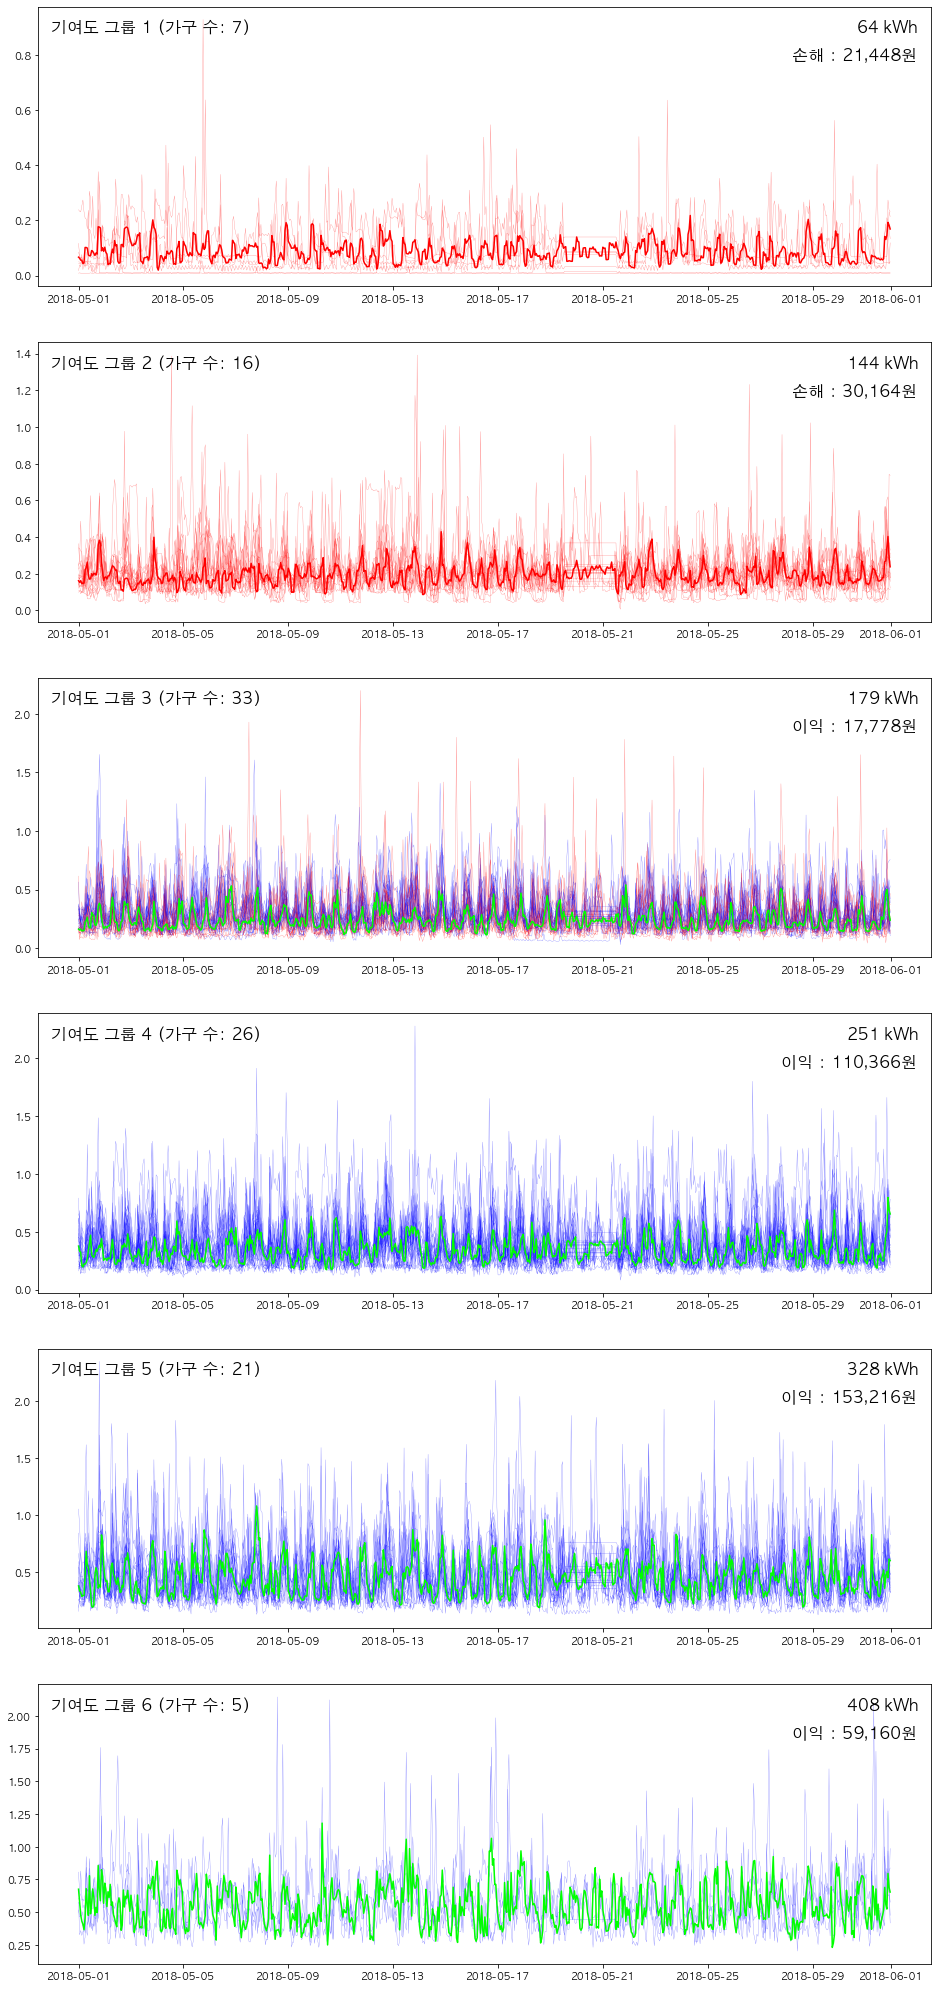

In [23]:
comp_cont_df = cont_mean_df.loc[pos_comp_cols]
single_cont_df = cont_mean_df.loc[pos_single_cols]

print("종합계약 유리 가구 수 기여도 그룹 : {}".format(set(comp_cont_df['contribution'])))
print("단일계약 유리 가구 수 기여도 그룹 : {}".format(set(single_cont_df['contribution'])))

fig, ax = plt.subplots(len(cc_cols),1, figsize=(16, 6 * len(cc_cols)))

for group_idx,group in enumerate(cont_group):
    cols = df.columns
    _group_cols = cols[(cont_mean_df['contribution'] == group).values]
    _comp_win_cnt = 0
    
    for _c in _group_cols:
        ax[group_idx].plot(df[_c], linewidth=0.3, color="r" if _c in pos_comp_cols else "b", alpha=0.5,
                          label="종합계약 유리 가구" if _c in pos_comp_cols else "단일계약 유리 가구")
        if _c in pos_comp_cols:
            _comp_win_cnt += 1
            
    err_bill = single_bill[_group_cols].loc[positive_count_per].sum() - comp_bill[_group_cols].loc[positive_count_per].sum()
        
    ax[group_idx].plot(
        cc_pattern[cc_cols[group_idx]], linewidth=1.5, color='r' if _comp_win_cnt == len(_group_cols) else 'lime')
    ax[group_idx].text(0.015, 0.925, "{} (가구 수: {})".format(cc_cols[group_idx], len(_group_cols)), 
                       ha='left', 
                       va='center',
                       fontsize=16,
                       transform=ax[group_idx].transAxes)
    ax[group_idx].text(0.985, 0.925, "{} kWh".format(round(cc_pattern[cc_cols[group_idx]].sum())), 
                       ha='right', 
                       va='center',
                       fontsize=16,
                       transform=ax[group_idx].transAxes)
    
    err_text = ""
    if abs(err_bill) > 0:
        if err_bill > 0:
            err_text = "손해 : {}원".format(
                format(int(err_bill), ","))
        else:
            err_text = "이익 : {}원".format(
                format(int(abs(err_bill)), ","))
        
    ax[group_idx].text(0.985, 0.825, err_text, 
                       ha='right', 
                       va='center',
                       fontsize=16,
                       transform=ax[group_idx].transAxes)

plt.show()

## 재분배를 통해 단일계약이 다시 유리해진 가구 확인

In [24]:
single_bill.loc[positive_count_per] = bill_df['재분배 최종청구금액']

In [25]:
pos_comp_cols = bill_cols[comp_bill.loc[positive_count_per] < single_bill.loc[positive_count_per]]
pos_single_cols = bill_cols[comp_bill.loc[positive_count_per] > single_bill.loc[positive_count_per]]

print("공동설비사용량 {}% 지점의 정보 {} : {}".format(positive_count_per, len(pos_comp_cols), len(pos_single_cols)))

공동설비사용량 20% 지점의 정보 36 : 72


종합계약 유리 가구 수 기여도 그룹 : {1.0, 2.0, 3.0}
단일계약 유리 가구 수 기여도 그룹 : {3.0, 4.0, 5.0, 6.0}


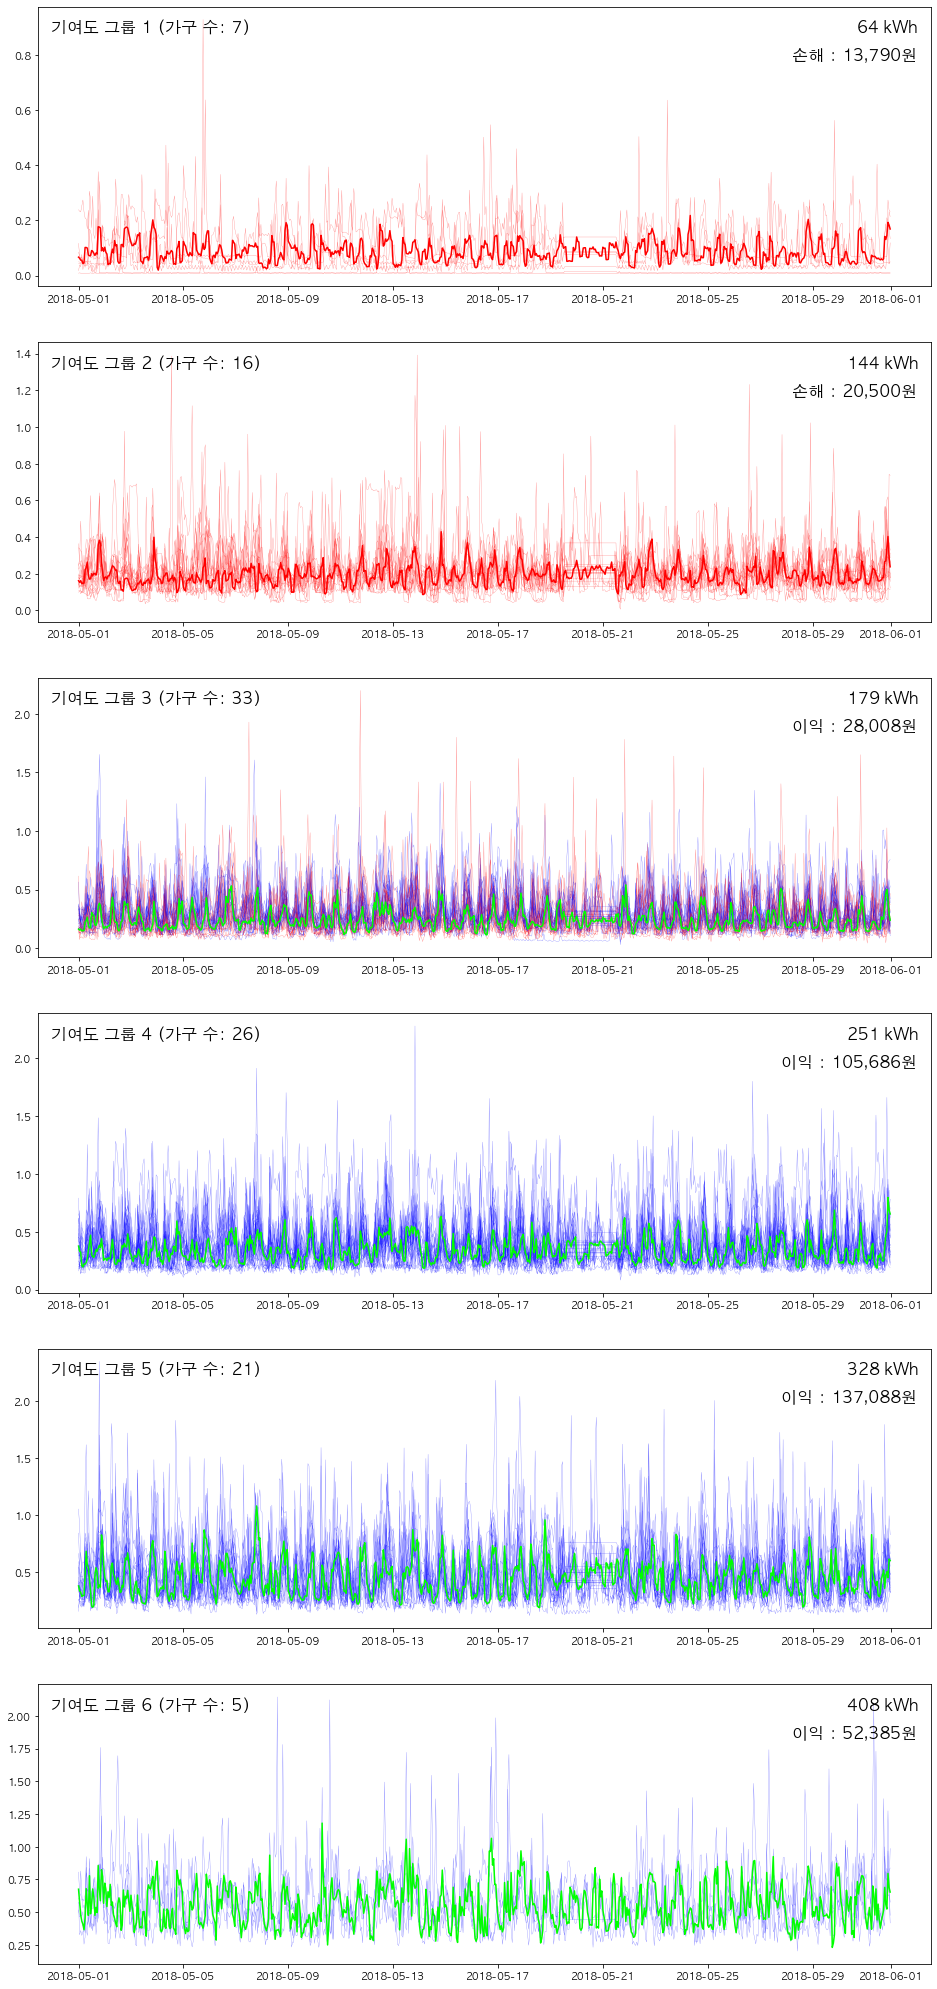

In [26]:
comp_cont_df = cont_mean_df.loc[pos_comp_cols]
single_cont_df = cont_mean_df.loc[pos_single_cols]

print("종합계약 유리 가구 수 기여도 그룹 : {}".format(set(comp_cont_df['contribution'])))
print("단일계약 유리 가구 수 기여도 그룹 : {}".format(set(single_cont_df['contribution'])))

fig, ax = plt.subplots(len(cc_cols),1, figsize=(16, 6 * len(cc_cols)))

for group_idx,group in enumerate(cont_group):
    cols = df.columns
    _group_cols = cols[(cont_mean_df['contribution'] == group).values]
    _comp_win_cnt = 0
    
    for _c in _group_cols:
        ax[group_idx].plot(df[_c], linewidth=0.3, color="r" if _c in pos_comp_cols else "b", alpha=0.5,
                          label="종합계약 유리 가구" if _c in pos_comp_cols else "단일계약 유리 가구")
        if _c in pos_comp_cols:
            _comp_win_cnt += 1
            
    err_bill = single_bill[_group_cols].loc[positive_count_per].sum() - comp_bill[_group_cols].loc[positive_count_per].sum()
        
    ax[group_idx].plot(
        cc_pattern[cc_cols[group_idx]], linewidth=1.5, color='r' if _comp_win_cnt == len(_group_cols) else 'lime')
    ax[group_idx].text(0.015, 0.925, "{} (가구 수: {})".format(cc_cols[group_idx], len(_group_cols)), 
                       ha='left', 
                       va='center',
                       fontsize=16,
                       transform=ax[group_idx].transAxes)
    ax[group_idx].text(0.985, 0.925, "{} kWh".format(round(cc_pattern[cc_cols[group_idx]].sum())), 
                       ha='right', 
                       va='center',
                       fontsize=16,
                       transform=ax[group_idx].transAxes)
    
    err_text = ""
    if abs(err_bill) > 0:
        if err_bill > 0:
            err_text = "손해 : {}원".format(
                format(int(err_bill), ","))
        else:
            err_text = "이익 : {}원".format(
                format(int(abs(err_bill)), ","))
        
    ax[group_idx].text(0.985, 0.825, err_text, 
                       ha='right', 
                       va='center',
                       fontsize=16,
                       transform=ax[group_idx].transAxes)

plt.show()